# Taller N° 1
**Integrantes:**  
1. Fernando Oliveros
2. George Otiz

**TEMA:** Educación.

EL siguiente conjunto de datos contiene la matrícula estadística de Educación Preescolar Básica y Media de Colombia del corte 2018 y 2021 oficiales definitivas en el departamento de Boyaca. La importacia que esta tiene es para medir los niveles de crecimiento que han tenido las instituciones teniendo encuenta el rango edad grado, ademas de la cantidad de estudiantes que ingresaron cada año a las instituciones del departamento.



**ANALISIS DE LOS DATOS**

El analisis de datos nos sirve para la extración de información útil. La utilizamos para descrubir patrones, tendencias y relaciones en los datos.
Archivo csv lo extraimos de la pagina Datos abiertos

**LIBRERIAS USADAS**

Importación de librerías que nos ayudaran con las graficas y tablas realizadas en nuestro proyecto.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt


**LECTURA DEL CSV**

Con el siguiente codigo pd.read_csv y el nombre del archivo llamamos al data que utilizaremos

In [ ]:
original_df = pd.read_csv('MATRICULAS_2021.csv')
original_df

,ANNO_INF,COD_DANE_DEPARTAMENTO,DEPARTAMENTO,COD_SECRETARIA,SECRETARIA,COD_DANE_MUNICIPIO,MUNICIPIO,CODIGO_DANE,NOMBRE_ESTABLECIMIENTO,COD_SECTOR,...,COD_ESPECIALIDAD,ESPECIALIDAD,EDAD,COD_GENERO,GENERO,COD_GRUPO_ETNICO,GRUPO_ETNICO,COD_SECTOR_CONPES,SECTOR_CONPES,TOTAL_MATRICULA
0,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000171,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1
1,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000049,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1
2,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000073,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,F,Femenino,0,No aplica,1,OFICIAL,1
3,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000103,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,F,Femenino,0,No aplica,1,OFICIAL,2
4,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000111,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2021,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,17,M,Masculino,0,No aplica,1,OFICIAL,1
671,2021,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,16,M,Masculino,0,No aplica,1,OFICIAL,4
672,2021,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,16,F,Femenino,0,No aplica,1,OFICIAL,2
673,2021,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,15,M,Masculino,0,No aplica,1,OFICIAL,3


Una vez hayamos cargado los datos y usamos la función "head" lo que nos permitira mostrar los primeros 5 datos.

In [ ]:
original_df.head()

,ANNO_INF,COD_DANE_DEPARTAMENTO,DEPARTAMENTO,COD_SECRETARIA,SECRETARIA,COD_DANE_MUNICIPIO,MUNICIPIO,CODIGO_DANE,NOMBRE_ESTABLECIMIENTO,COD_SECTOR,...,COD_ESPECIALIDAD,ESPECIALIDAD,EDAD,COD_GENERO,GENERO,COD_GRUPO_ETNICO,GRUPO_ETNICO,COD_SECTOR_CONPES,SECTOR_CONPES,TOTAL_MATRICULA
0,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000171,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1
1,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000049,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1
2,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000073,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,F,Femenino,0,No aplica,1,OFICIAL,1
3,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000103,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,F,Femenino,0,No aplica,1,OFICIAL,2
4,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000111,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,1


Con la siguiente funcion original_df.info() nos sirve para realiza un resumen de nuestros datos, el cual nos ayudará para la resolución de tareas que vamos haciendo.

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ANNO_INF                675 non-null    int64 
 1   COD_DANE_DEPARTAMENTO   675 non-null    int64 
 2   DEPARTAMENTO            675 non-null    object
 3   COD_SECRETARIA          675 non-null    int64 
 4   SECRETARIA              675 non-null    object
 5   COD_DANE_MUNICIPIO      675 non-null    int64 
 6   MUNICIPIO               675 non-null    object
 7   CODIGO_DANE             675 non-null    int64 
 8   NOMBRE_ESTABLECIMIENTO  675 non-null    object
 9   COD_SECTOR              675 non-null    int64 
 10  SECTOR                  675 non-null    object
 11  COD_CALENDARIO          675 non-null    int64 
 12  CALENDARIO              675 non-null    object
 13  CODIGO_DANE_SEDE        675 non-null    int64 
 14  NOMBRE_SEDE             675 non-null    object
 15  COD_ZO

**MOSTRAR COLUMNAS**

Con el metodo loc [ ] puedo mostrar cualquier columna de nuestro dataframe. En este caso seleccionamos tres columnas.

In [ ]:
original_df.loc[:, ['ANNO_INF', 'EDAD', 'CODIGO_GRADO']]

,ANNO_INF,EDAD,CODIGO_GRADO
0,2019,7,2
1,2019,7,2
2,2019,7,2
3,2019,7,2
4,2019,7,2
...,...,...,...
670,2021,17,10
671,2021,16,10
672,2021,16,10
673,2021,15,10


**MOSTRAR FILAS**

Con la función "iloc" podemos mostrar las filas e incluso seleccionar las filas que quieras mostrar.
En este caso seleccionamos la fila 10 al 20.

In [ ]:
original_df.iloc[9:21]

,ANNO_INF,COD_DANE_DEPARTAMENTO,DEPARTAMENTO,COD_SECRETARIA,SECRETARIA,COD_DANE_MUNICIPIO,MUNICIPIO,CODIGO_DANE,NOMBRE_ESTABLECIMIENTO,COD_SECTOR,...,COD_ESPECIALIDAD,ESPECIALIDAD,EDAD,COD_GENERO,GENERO,COD_GRUPO_ETNICO,GRUPO_ETNICO,COD_SECTOR_CONPES,SECTOR_CONPES,TOTAL_MATRICULA
9,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000154,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,M,Masculino,0,No aplica,1,OFICIAL,2
10,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,215106000162,I.E. TECNICA MANUEL BRICEÑO,1001,...,0,No aplica,7,F,Femenino,0,No aplica,1,OFICIAL,3
11,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,13,F,Femenino,0,No aplica,1,OFICIAL,1
12,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,14,F,Femenino,0,No aplica,1,OFICIAL,1
13,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,14,M,Masculino,0,No aplica,1,OFICIAL,1
14,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,15,F,Femenino,0,No aplica,1,OFICIAL,5
15,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,15,M,Masculino,0,No aplica,1,OFICIAL,8
16,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,16,F,Femenino,0,No aplica,1,OFICIAL,4
17,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,16,M,Masculino,0,No aplica,1,OFICIAL,5
18,2019,15,BOYACÁ,3769,BOYACÁ,15106,BRICEÑO,315106000124,I.E. TECNICA MANUEL BRICEÑO,1001,...,10,Agropecuario,17,M,Masculino,0,No aplica,1,OFICIAL,2


**CONSULTA TRES VALORES CUANTITATIVOS**

Para el siguiente paso utilizaremos las siguientes varible: ANNO_INF, CODIGO_GRADO y EDAD.

**MODA**

La moda es el valor que aparace con mayor frecuencia en una columna de nuestro dataframe y para calcular este valor usamos la función 'mode()'.

In [ ]:
original_df['ANNO_INF'].mode()

0    2021
dtype: int64

In [ ]:
original_df['CODIGO_GRADO'].mode()

0    5
dtype: int64

In [ ]:
original_df['EDAD'].mode()

0    10
dtype: int64

**MEDIA**

Para calcular la media utilizamos la función "mean()" la cual muestra el valor medio de un grupo de datos.


In [ ]:
original_df['ANNO_INF'].mean()

2019.5540740740742

In [ ]:
original_df['CODIGO_GRADO'].mean()

4.373333333333333

In [ ]:
original_df['EDAD'].mean()

9.977777777777778

**MEDIANA**

Para hallar la mediana utilizaremos la función median que nos permite calcular la mediana de nuestro dataframe teniendo en cuenta que selecciona solo los valores numericos, es decir las columnas tipo float, entero, etc.

In [ ]:
original_df['ANNO_INF'].median()

2020.0

In [ ]:
original_df['EDAD'].median()

9.0

In [ ]:
original_df['CODIGO_GRADO'].median()

4.0

**MINIMO**
El minimo por el contrario muestra el valor minimo dentro de nuestro conjunto de datos. Con la función 'min()' nos muestra este valor.

In [ ]:
original_df['EDAD'].min()

4

In [ ]:
original_df['ANNO_INF'].min()

2018

In [ ]:
original_df['CODIGO_GRADO'].min()

0

**MAXIMO**

El maximo como su nombre lo indica es el valor maximo dentro de nuestro conjunto de datosa. Utilizado la funcion 'max()' obtendremos ese valor.

In [ ]:
original_df['EDAD'].max()

20

In [ ]:
original_df['ANNO_INF'].max()

2021

In [ ]:
original_df['CODIGO_GRADO'].max()

11

**VISUALIZACION DE LOS DATOS**

A través de esta hacemos que los datos mostrados sea mas visibles y de esta forma el usuario tenga una mejor comprensión y analisis de los mismos.

***Histogramas***

Para la realización del histograma utilizamos 'plotly' una librería que permite generar graficos interactivos. El histograma sirve para entender mejor la distribución de datos y para identificar caracteriticas importantes.

Para los siguientes histogramas seguimos trabajando con las columnas de tipo cuantitativo con las que trabajamos la media, mediana, moda, minimo y maximo.


In [ ]:
# Seleccionamos la columna "valores"
valores = original_df['EDAD']

# Creamos un histograma con 20 bins
fig = px.histogram(valores, nbins=25, title= 'HISTOGRAMA DE LA COLUMNA "EDAD"')

# Mostramos el histograma
fig.show()

In [ ]:
# Seleccionamos la columna "valores"
valores = original_df['CODIGO_GRADO']

# Creamos un histograma con 20 bins
fig = px.histogram(valores, nbins=20, title= 'HISTOGRAMA DE LA COLUMNA "CODIGO_GRADO"')

# Mostramos el histograma
fig.show()

In [ ]:
# Seleccionamos la columna "valores"
valores = original_df['ANNO_INF']

# Creamos un histograma con 20 bins
fig = px.histogram(valores, nbins=20, title= 'HISTOGRAMA DE LA COLUMNA "ANNO_INFO"')

# Mostramos el histograma
fig.show()

**Diagrama Caja de bigotes**

La caja de bigotes es una herramienta que nos sirve para visualizar la distribución de un conjunto de datos y compararla entre diferentes grupos o variable. Para realizar una caja de bigotes usamos la librería seaborn.

**Explicación de como funciona una caja de bigotes.**

La linea del centro representa la media, el cual es el valor que separa el conjunto de datos en dos partes iguales.
Los "bigotes" son las lineas que se extiende desde los bordes del rectangualo hasta el valor minimo y maximo de los datos, excluyendo los valores atípicos.
Los valores atípicos se muestran como puntos fuera de los bigotes.

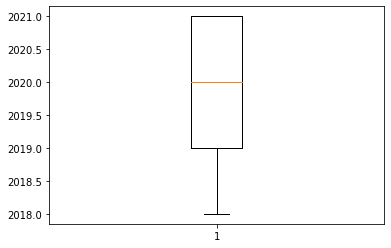

In [ ]:
plt.boxplot((original_df['ANNO_INF']))
plt.show()

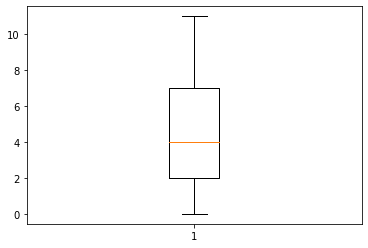

In [ ]:
plt.boxplot((original_df['CODIGO_GRADO']))
plt.show()

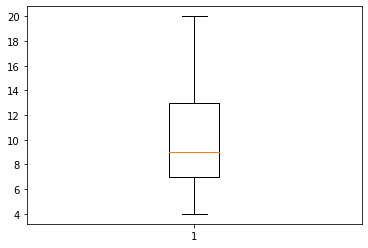

In [ ]:
plt.boxplot((original_df['EDAD']))
plt.show()

**FRECUENCIA ABSOLUTA**

La frecuencia absoluta indica el numero de veces que un valor aparece en un conjunto de datos. Para calcularla utilizamos la función 'pd.value_counts()'.
En este caso usamos las tres columnas cualitativas de nuestro dataframe las cuales son GENERO, ZONA y NOMBRE_SEDE.

In [ ]:
f_absoluta=pd.value_counts(original_df['GENERO'])
f_absoluta

Masculino    373
Femenino     302
Name: GENERO, dtype: int64

In [ ]:
f_absoluta=pd.value_counts(original_df['ZONA'])
f_absoluta

Rural     371
Urbana    304
Name: ZONA, dtype: int64

In [ ]:
f_absoluta=pd.value_counts(original_df['NOMBRE_SEDE'])
f_absoluta

I.E. TECNICA MANUEL BRICEÑO - SEDE PRINCIPAL    211
CONC URB                                         93
ESC RURAL TARPEYA                                54
COL BAS MEDIA LUNA                               42
ESC RURAL VIJAGUAL                               36
ESC MORAY ALTO                                   29
ESC RURAL MORAY BAJO                             29
ESC TABOR                                        27
ESC DIAMANTE                                     26
ESC BUENAVISTA ALTO                              25
ESC PALO BLANCO                                  25
ESC JORGE ARMANDO QUIROGA                        24
ESC CUCAITA                                      24
ESC MIGUEL ANTONIO LETRADO                       15
ESC MINACHAL                                     15
Name: NOMBRE_SEDE, dtype: int64

**FRECUENCIA RELATIVA**

Para calcular la frecuencia relativaa de un conjunto de datos se divide la frecuencia absoluta de caa valor por el número total de valores en el conjunto de datos. Usando la función 'value_counts' la cual sirve ara contar la frecuencia absoluta realizamos el calculo.

In [ ]:
f_relativa = 100 * original_df['GENERO'].value_counts() / len(original_df['GENERO'])
f_relativa

Masculino    55.259259
Femenino     44.740741
Name: GENERO, dtype: float64

In [ ]:
f_relativa = 100 * original_df['ZONA'].value_counts() / len(original_df['ZONA'])
f_relativa

Rural     54.962963
Urbana    45.037037
Name: ZONA, dtype: float64

In [ ]:
f_relativa = 100 * original_df['NOMBRE_SEDE'].value_counts() / len(original_df['SECTOR'])
f_relativa

I.E. TECNICA MANUEL BRICEÑO - SEDE PRINCIPAL    31.259259
CONC URB                                        13.777778
ESC RURAL TARPEYA                                8.000000
COL BAS MEDIA LUNA                               6.222222
ESC RURAL VIJAGUAL                               5.333333
ESC MORAY ALTO                                   4.296296
ESC RURAL MORAY BAJO                             4.296296
ESC TABOR                                        4.000000
ESC DIAMANTE                                     3.851852
ESC BUENAVISTA ALTO                              3.703704
ESC PALO BLANCO                                  3.703704
ESC JORGE ARMANDO QUIROGA                        3.555556
ESC CUCAITA                                      3.555556
ESC MIGUEL ANTONIO LETRADO                       2.222222
ESC MINACHAL                                     2.222222
Name: NOMBRE_SEDE, dtype: float64

**GRAFICAS**

Para el siguiente paso graficamos las columnas anteriormente mecionadas y para así mostrar con claridad los resultados, para esto utilizamos graficos de barras y torta para cada columna.

**COLUMNA GENERO**

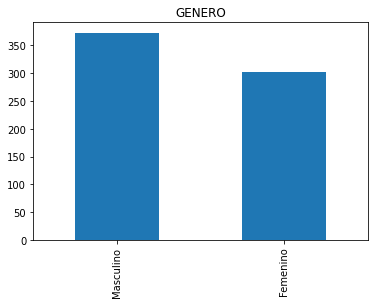

In [ ]:
grafico_1 = original_df['GENERO'].value_counts().plot(kind='bar',title='GENERO')
grafico_1

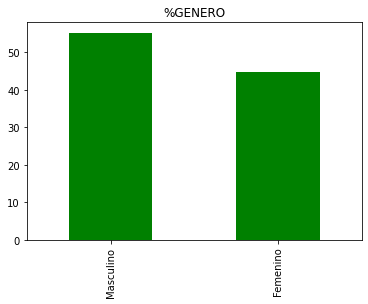

In [ ]:
grafico_2 = plot = (100 * original_df['GENERO'].value_counts() / len(original_df['GENERO'])).plot(kind = 'bar', title = '%GENERO', color='green')
grafico_2

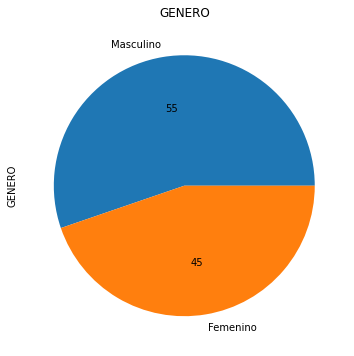

In [ ]:
grafico_3 = original_df['GENERO'].value_counts().plot(kind='pie', autopct = '%2.f', figsize = (6, 6), title = 'GENERO')
grafico_3

**COLUMNA ZONA**

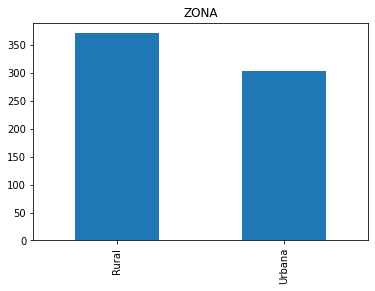

In [ ]:
grafico_4 = original_df['ZONA'].value_counts().plot(kind='bar',title='ZONA')
grafico_4

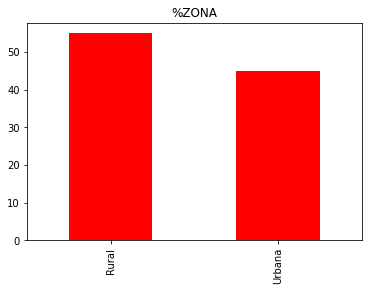

In [ ]:
grafico_5 = plot = (100 * original_df['ZONA'].value_counts() / len(original_df['ZONA'])).plot(kind = 'bar', title = '%ZONA', color='red')
grafico_5

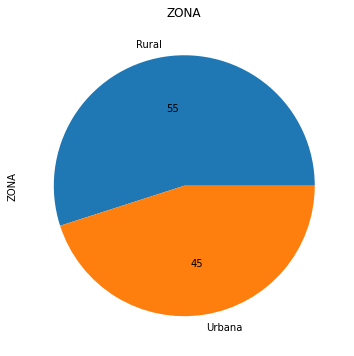

In [ ]:
grafico_6 = original_df['ZONA'].value_counts().plot(kind='pie', autopct = '%2.f', figsize = (6, 6), title = 'ZONA')
grafico_6

**COLUMNA NOMBRE_SEDE**

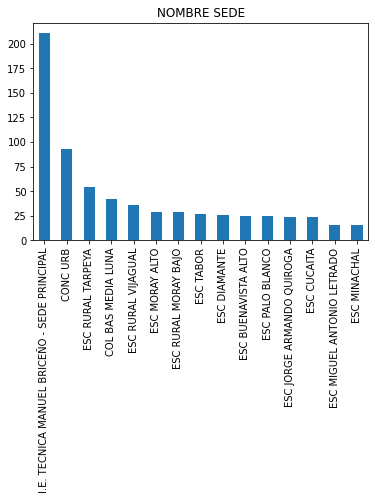

In [ ]:
grafico_7 = original_df['NOMBRE_SEDE'].value_counts().plot(kind='bar',title='NOMBRE SEDE')
grafico_7

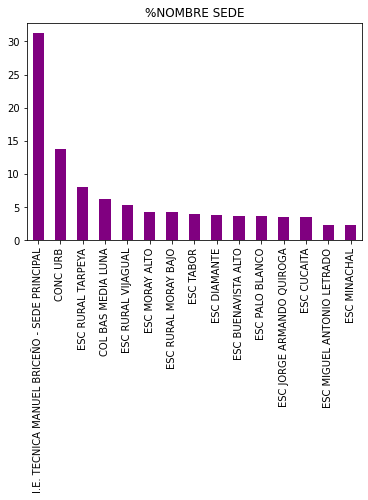

In [ ]:
grafico_8 = plot = (100 * original_df['NOMBRE_SEDE'].value_counts() / len(original_df['NOMBRE_SEDE'])).plot(kind = 'bar', title = '%NOMBRE SEDE', color='purple')
grafico_8

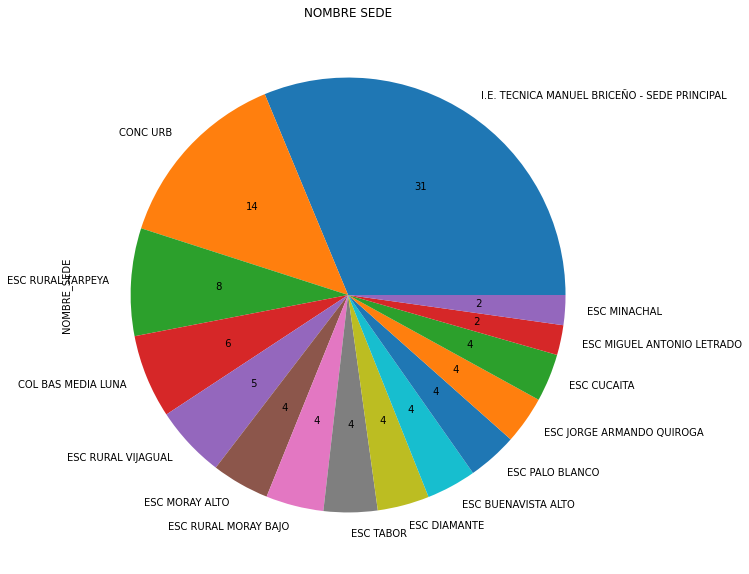

In [ ]:
grafico_9 = original_df['NOMBRE_SEDE'].value_counts().plot(kind='pie', autopct = '%2.f', figsize = (10, 10), title = 'NOMBRE SEDE')
grafico_9

**3. INTERPRETACION DE LOS DATOS**





**CONCLUSION**

A manera de conclusión podemos decir que el departamento de boyaca durante el periodo de 2018 hasta el año 2021 tuvo un incremento notable de estudiantes que ingresaban a las diferentes instituciones, siendo el grado 5 el que mas estudiantes recibio durante el periodo de estos cuatro años recibiendo estudiantes entre las edades de 9 a 10 años, esto lo podemos ver reflejo en los histogramas, tambien podemos concluir que el mayor numero de estudiante que ingreso a las intituciones educativas del departamento fueron hombres, obteniendo el 55% durante el periodo de los cuatro años, ademas que la zona en la que mas se acogia estudiantes es en la rural, lo que podemos atender que mas chicos de estas zonas estan teniendo accecibilidad al sistema educativo y por ende poder tener educación para seguir adquiriendo conocimientos, y por parte de la institucion principal llevandose la mayor cantidad de estos.